[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/bads/blob/master/tutorials/3_nb_predictive_analytics.ipynb) 

# Chapter 3 - Foundations of predictive analytics
The lecture has introduced the data structure for predictive analytics. We need data with inputs variables and a **target variable**. The goal of predictive analytics is to derive a functional relationship between the input variables and the target. We assume that we can observe or control the input variables. Hence, our predictive model, the functional relationship between inputs and the target, facilitates forecasting the expected value of the target variable based on the input variables. Recall from the lecture that there are many alternative terms in use to refer to the input variables. In the interest of having consistent terminology, we will use the term **features** instead of input variables in the following. 


---


Here is the outline of the tutorial:
- Our first predictive model: linear regression
- The Boston Housing data set
- Data for classification 
- Synthetic data generation in sklearn

## Our First Predictive Model: Linear Regression
Linear regression assumes a linear additive relationship between features and the target. Specifically, we assume a model:
$$ y = \beta_0 + \beta_1 x_1 + + \beta_2 x_2 + ... + \beta_m x_m + \epsilon $$
where $y$ is the target variable, $\beta$ denotes the regression coefficients (as usual), $x_j, j=1, ..., m$ are our features, and $\epsilon$ denotes the error term. 

### Generating Data

To warm-up, let's create some synthetic data for regression modeling. To keep things simple, we consider a univariate setting with only feature. The classic example in business is that of a price response function, so we can assume that our single feature corresponds to the sales price of some product.


In [1]:
# load relevant libraries

import random
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)  # stops Python from producing output in scientific notation

random.seed(123) # for reproducibility

In [2]:
# first, determine dataset size and generate X

n = 100 # dataset size

X = np.zeros(n) # initialise empty list

for i in range(n): # generate 100 numbers
  num = random.randint(20,100) # will select integers randomly between 20 and 100
  X[i] = num # add integer to list X

X

array([ 26.,  54.,  31.,  72.,  54.,  33.,  24.,  68.,  88.,  91.,  62.,
        63.,  26.,  40.,  37.,  63.,  91.,  62.,  51.,  40.,  20.,  75.,
        31.,  96.,  68.,  28.,  20.,  60.,  77.,  33.,  25.,  31.,  38.,
        36.,  22.,  57.,  75.,  93.,  81.,  53.,  80.,  24.,  59.,  63.,
        86.,  81.,  46.,  97.,  87.,  92.,  60.,  21.,  70.,  85.,  75.,
        88.,  96.,  82.,  86.,  73.,  67.,  85.,  24.,  43.,  30.,  82.,
        53.,  41.,  62.,  63.,  90.,  70.,  29.,  78.,  69.,  93.,  63.,
        22.,  44.,  95.,  31., 100.,  66.,  21.,  65.,  49.,  71.,  88.,
        84.,  27.,  56.,  83., 100.,  49.,  89.,  81.,  42.,  39.,  88.,
        76.])

In [3]:
# next, determine y based on X's values and add randomness to make it more challenging for the machine

y = np.zeros(n) # create array of 0s of the length X

for i in range(0,n):
  num = X[i]/2 + np.random.normal(0,5,1) # for this relationship, the true beta_1 = 0.5. Randomness also added.
  y[i] = num # replace 0s in y with the transformed X value

y= np.around(y, 2) # round all values to 2 decimals

y

array([13.92, 28.72, 13.62, 30.3 , 28.61,  8.06, 17.37, 20.55, 56.57,
       51.45, 31.16, 33.52, 16.79, 31.21, 18.17, 34.76, 45.59, 31.36,
       25.06, 18.99, 12.22, 37.18,  7.76, 51.79, 33.57, 11.86, 11.07,
       30.69, 44.38, 13.03, 10.61, 21.58, 14.88, 12.4 , 10.04, 47.8 ,
       25.38, 49.48, 42.36, 26.63, 43.17, 18.4 , 27.42, 24.21, 31.9 ,
       60.6 , 33.33, 49.23, 56.32, 36.34, 23.27,  7.42, 30.71, 44.37,
       37.55, 45.06, 35.75, 34.76, 48.15, 34.03, 36.27, 37.13, 10.71,
       20.21, 14.62, 44.15, 24.92, 19.38, 23.35, 38.04, 36.28, 34.65,
       13.8 , 42.79, 32.34, 50.95, 29.79,  6.88, 28.56, 46.87, 18.  ,
       60.22, 32.21, 12.91, 34.71, 22.25, 32.73, 40.59, 42.35,  7.06,
       30.7 , 36.36, 52.91, 22.62, 43.94, 46.71, 16.95, 19.54, 46.19,
       41.23])

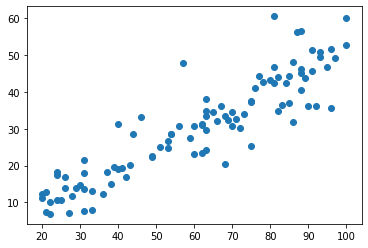

In [4]:
plt.scatter(X, y) # plot our X and y values on a scatterplot using pyplot

### Obtaining Coefficients

We know from our undergraduate studies how to compute our estimators $\hat \beta_0$ and $\hat \beta_1$ of the intercept and slope of our simple linear regression model, respectively. 

$$ \hat \beta_1 = \frac{\sum^{n}_{i=1}\left(x_i-\bar x \right) \left( y_i - \bar y\right)}{\sum^{n}_{i=1}\left(x_i-\bar x \right)^2} $$

$$ \hat \beta_0 = \bar y - \hat \beta_1 \bar x$$

where $\bar x$ and $\bar y$ denote the mean price (feature) and sales (target), respectively. 

Let's augment the above graph by adding the regression line.

In [5]:
X_bar = np.mean(X)
y_bar = np.mean(y)

# recreate the beta hat 1 equation above:
denominator = numerator = 0 # initialise variable

for i in range(0,n):
  numerator += (X[i] - X_bar)*(y[i] - y_bar) # remember += means add the right hand side to the variable's value
  denominator += (X[i] - X_bar)** 2
  beta_hat_1 = numerator / denominator

# recreate the beta hat 0 equation above:
beta_hat_0 = y_bar - beta_hat_1 * X_bar

# check estimate values
print(beta_hat_0, beta_hat_1)

-0.7483998064810145 0.5152279452672781


In [6]:
# create a point at the end of X's range (100) and calculate the y value according to our estimate

y_val_x_at_100 = beta_hat_0 + beta_hat_1 * 100

y_val_x_at_100

50.77439472024679

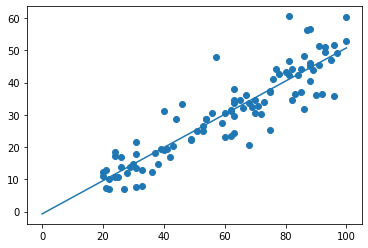

In [7]:
# plot scatterplot and the line of best fit

plt.scatter(X, y)
plt.plot([0,100], [beta_hat_0,y_val_x_at_100]) # the first list are x coordinate values, the second are y values so this creates a line through (0, beta_hat_0) and (100, y_val_x_at_100)
plt.show()

### Using sklearn to Solve
All of the above can be quickly and efficiently done also through sklean to obtain the same result.

In [8]:
# when using sklearn, it is important to reshape your data so that is appears as a column in a dataframe

X = X.reshape(-1,1) # reshapes array to a vertical column (originally the shape is (100,), we need it to be (100,1))
y = y.reshape(-1,1)
print(X.shape, y.shape)

(100, 1) (100, 1)


In [9]:
# using sklearn, we can get the same result using the LinearRegression function

from sklearn.linear_model import LinearRegression

lin = LinearRegression().fit(X,y)

print(lin.intercept_, lin.coef_) # these values correspond to estimated beta 0 and estimated beta 1 respectively

[-0.74839981] [[0.51522795]]


### Predicting on New Samples from the Same Population
Recall that the very point of predictive modeling is to forecast the value of the target variable for new cases. To demonstrate this, we can use the regression function just estimated, our model, and apply it to some novel data.

In [10]:
# generate new X values:

n_new = 10

X_new = np.zeros(n_new) # initialise empty list

for i in range(0,n_new): # generate 10 numbers
  num = random.randint(20,100) # will select integers randomly between 20 and 100
  X_new[i] = num # add integer to list X

X_new

array([68., 79., 25., 21., 37., 78., 44., 22., 52., 65.])

In [11]:
# generate true y values for the new X values:

y_true = np.zeros(n_new) # create array of 0s of the length X_new

for i in range(0,n_new):
  num = X_new[i]/2 + np.random.normal(0,5,1) # same relationship as before, true beta 1 is 0.5
  y_true[i] = num

y_true = np.around(y_true, 2) # round all values to 2 decimals

y_true

array([38.67, 43.21,  9.85, 17.23, 17.93, 37.7 , 22.31,  6.41, 27.33,
       33.64])

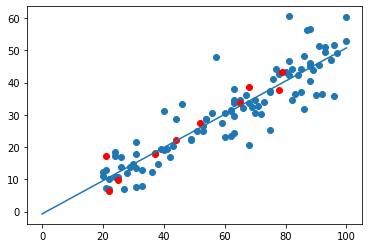

In [12]:
# plot new values with old values:

plt.scatter(X, y) # plot original points
plt.scatter(X_new, y_true, color='red') # colour new points red
plt.plot([0,100], [beta_hat_0,y_val_x_at_100]) # pass line through coordinates (0, beta_hat_0) and (100, y_val_x_at_100)
plt.show()

In [13]:
# use our model to predict the y value for the new X values:
y_pred = np.zeros(n_new)

for i in range(0,n_new):
  y_pred[i] = beta_hat_0 + beta_hat_1 * X_new[i]

y_pred

array([34.28710047, 39.95460787, 12.13229883, 10.07138704, 18.31503417,
       39.43937992, 21.92162979, 10.58661499, 26.04345335, 32.74141664])

In [14]:
# calculate residuals:

res = y_true - y_pred
res

array([ 4.38289953,  3.25539213, -2.28229883,  7.15861296, -0.38503417,
       -1.73937992,  0.38837021, -4.17661499,  1.28654665,  0.89858336])

In [15]:
# root mean squared error:

pred_error = np.mean(np.sqrt(res ** 2))

pred_error

2.5953732753326575

### Predictions for Different Populations

Predictive analytics is based on the assumption that the data, which we observed in the past or gathered during business operations is representative for future data. Note how the previous example fulfills this assumption. 
We used the same mechanism or *data generation process* to simulated the old and the new data. To stress the importance of stable data generation processes, **let us simulate what would happen if our environment changes**. For example, people might get more price sensitive in a recession, so that a price-response relationship that was estimated on data from before the recession is no longer representative. Let's simulate such a situation using Python.

In [16]:
y_true_2 = np.zeros(n_new) # create array of 0s of the length X_new

for i in range(0,n_new):
  num = X_new[i]/4 + np.random.normal(0,5,1) # altered relationship, now the true beta_1 is 0.25 instead of 0.5
  y_true_2[i] = num

y_true_2 = np.around(y_true_2, 2) # round all values to 2 decimals

y_true_2

array([19.18, 22.96,  6.53,  9.59, 11.57, 28.2 ,  9.69,  6.89, 11.72,
       26.7 ])

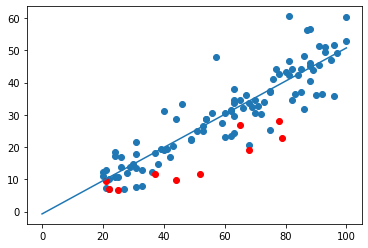

In [17]:
# plot new values with old values:

plt.scatter(X, y)
plt.scatter(X_new, y_true_2, color='red') # colour new points red
plt.plot([0,100], [beta_hat_0,y_val_x_at_100]) # pass line through coordinates (0, beta_hat_0) and (100, y_val_x_at_100)
plt.show()

In [18]:
# predict using our ORIGINAL coefficients:
y_pred_2 = np.zeros(n_new)

for i in range(0,n_new):
  y_pred_2[i] = beta_hat_0 + beta_hat_1 * X_new[i]

y_pred_2

array([34.28710047, 39.95460787, 12.13229883, 10.07138704, 18.31503417,
       39.43937992, 21.92162979, 10.58661499, 26.04345335, 32.74141664])

In [19]:
# residual and RMSE calculation:

res_2 = y_true_2 - y_pred_2
res_2

array([-15.10710047, -16.99460787,  -5.60229883,  -0.48138704,
        -6.74503417, -11.23937992, -12.23162979,  -3.69661499,
       -14.32345335,  -6.04141664])

In [20]:
pred_error_2 = np.mean(np.sqrt(res_2 ** 2))

print("Error from Similar Data:", pred_error, ", Error from Data with New Relationship:", pred_error_2)

Error from Similar Data: 2.5953732753326575 , Error from Data with New Relationship: 9.246292306142339


You might think that this a basic exercise. Do not underestimate our example. You just learned a very important lesson that you should always bear in mind when venturing the realms of predictive analytics. If there is a change in the mechanism that generated your data, a predictive model will become outdated and its quality will decrease. Practically speaking, the hard part is to know when such a change occur. That is something for later. For now, we bear in mind that predictive analytics requires **the training data to represent well the data to which a model will be applied.** 

## The Boston Housing Data Set
Idea is to run a proper regression using the statsmodel api. 
- Introduce the Boston Housing data set (load by downloading from the web)
  - explain task
  - showcase variables using some Pandas func.
- fit regression model and generate standard output (R2, coefficients, T-value, ...)
- Link the analysis to previous exercise by highlighting that we used all data. We do not have any new data. Can we simulate it? Split the data in two half, fit regression on one, apply to the other and compare MSE

In [21]:
import sklearn.datasets as datasets
import pandas as pd

df = datasets.load_boston()

X = pd.DataFrame(data=df.data, columns=df.feature_names) #place input arrays into table
y = pd.DataFrame(data=df.target, columns=['Target']) #place target array into table

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [22]:
y.head()

,Target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [23]:
reg = LinearRegression().fit(X,y)

print(lin.intercept_, lin.coef_)

[-0.74839981] [[0.51522795]]


## Data for classification 
The lecture has introduced two flavors of predictive modeling, regression and classification. So far, we have focused on regression. Recall that classification differs from regression in the scaling of the target variable. Regression assumes a numeric target variable, like sales, whereas classification assumes a discrete target. For simplicity, we consider a binary target variable with just two states. You have seen many business use cases for binary classification in the lecture. Here, we simply assume examples 

- Introduce students to data generation for classification 
- lecture has not introduced any classifier up to this point. Still showcase the logit model, say something like similar to linear regression but for classification, details to follow in chapter 5. Use statsmodels api for the logit model
- Whole part can be based on the below code, which is nice and already has explanations. Only some adjustments needed


---
# The following part is copied from another course and needs adjustment
---


## Generating Data

For this exercise we will generate our own (synthetic) data, to better understand what we are doing and what the logistic regression in particular does. For example, we will consider data in two dimensions. This is useful because we can easily plot the data.

To create synthetic data, you will use routines to generate random numbers. To ensure that you get the same result when you run your code multiple times, you should first fix the seed of the random number generator. We have already created a *code* cell below, which you can now edit to fix the seed.

(Hint: if you have paid attention to the [read me](https://github.com/stefanlessmann/VHB_ProDoc_ML/blob/master/README.md), this task should be familiar.) 

In [24]:
# set random seed, such that every run yields the same sequence of random numbers
np.random.seed(1234)

We want to generate a data set for binary classification. This means that each of the data points that we will create belongs to one out of two classes.

A surprisingly large number of real-life (business) problems can be framed as a two-class classification problem, as we will discuss intensively in the course. 

To facilitate plotting the data, we will focus on a two-dimensional setting. Each of our data points is characterized by two attributes or, if you prefer, (independent) variables. Assume you want to predict whehter a machine is going to break in the next week. Break or do not break are the two possible states (i.e., classes). The attributes could then be the temperature of the machine and the time it is running.

In this task, we assum that the data of each class comes from a multivariate normal distribution. Utilize the different functions within *numpy.random* to generate normally distributed data. Note that you need two normals with different parameters; one set of parameters for class 1 and another set of parameters for class 2. You can play with the parameters to create data in which the seperation of the two classes using a classification model is easier or harder. 

Create a reasonable number of observations, e.g., around 1000 - 5000. Recall that you need to store three values for each data point, one for the class label (class 1 or class 2) and one value for each of the two attributes. Examine ways to store the data in a matrix-like array. 

In [25]:
# Write code to generate your data with two normally distributed attributes and a binary class label.


# var_1 = np.random.multivariate_normal(mean=[0,0], cov=[[1, .75],[.75, 1]], size=1000)
# var_2 = np.random.multivariate_normal(mean=[0,0], cov=[[1, .75],[.75, 1]], size=1000)

class1_x = np.random.normal(loc=1, scale=1, size=1000)
class1_y = np.random.normal(loc=1, scale=1, size=1000)

class2_x = np.random.normal(loc=4, scale=1, size=1000)
class2_y = np.random.normal(loc=4, scale=1, size=1000)

lab1 = np.repeat(0, 1000)
lab2 = np.repeat(1, 1000)

class1 = np.vstack((class1_x, class1_y)).T
class2 = np.vstack((class2_x, class2_y)).T

data = np.vstack((class1,class2))
labels = np.concatenate((lab1,lab2))

Once you have created your data, create a scatter plot using the function *scatter*, which the library matplotlib provides. Here you can find an [example how your result shoud look like](https://github.com/stefanlessmann/VHB_ProDoc_ML/blob/master/prodoc_ml_miniassign_1_demo_plot1.png). In the example, we have denoted our two variables as $x_1$ and $x_2$ and used the binary class label to color the data points. 

Do not forget to alter the parameters of your two normal distributions and examine how changing the parameters make the two classes easier or harder to distinguish.
  

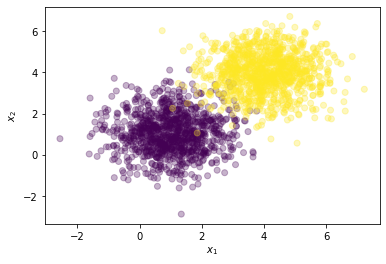

In [26]:
# Write code to create the scatter plot
plt.scatter(data[:,0], data[:,1], c=labels, alpha=.3);
plt.xlabel("$x_1$");
plt.ylabel("$x_2$");

Next up, we would like to solve our toy classification problem using logistic regression. By 'solve' we mean that the logistic model should be able to distinguish data points of the two classes based on their attribute values. More formally, given a data point $ \boldsymbol x \in \mathbb{R}^2 $ with values $x_1$ and $x_2$, our logistic model should provide an estimate of the probability $p \left ( y| \boldsymbol x \right )$, with $ y \in \left \{ 0,1 \right \} $ denoting the binary class label. To achieve this, the logistic model will maximize the likelihood of the data. In case this does not sound familiar, note that we will brielfy revisit logistic regression in the course. Still, it would be a good idea to read the [wikipedia page on logistic regression](https://en.wikipedia.org/wiki/Logistic_regression) or one of the many tutorials on the topic (e.g., [here](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)) to refresh your stats skills.  

With regard to Python, both statsmodels and scikit learn are good python packages to use for logistic regression. Start with using scikit learn. Make sure to set the penalty to 'none' such that no regularization is applied.

In [27]:
# Insert code to estimate a logistic regression model using scikit learn
model = LogisticRegression(penalty='none', fit_intercept=True)
model.fit(data, labels)

NameError: ignored

Having estimated the logit model, we want to evaluate our results. To that end, we first inspect the estimated model, i.e. the intercept term and the coefficients. You should be familiar with this step from your experiences with [linear regression](https://en.wikipedia.org/wiki/Linear_regression).

In [ ]:
# Print intercept and coefficients of the estimated logit model
print('Intercept:')
print(model.intercept_)

print('Coefficients:')
print(model.coef_)

Speaking about linear regression, wasn't there are nice way to summarize the estimated model, depicting coefficient values, test statistics, p-values and the like? Should'nt logistic regression gives a similarly neat output? Yes, it should and it actually can, provided we use the statsmodels package instead of scikitlearn. In brief, scikit-learn is the 'goto-library' for machine learning in Python. We will use it a lot in the course. However, let's also play with statsmodels. 

Repeat the above task and estimate a logit model but this time using statsmodels.  Also produce a compelling summary table of your model including p-values and fitting statistics. Use a different variable name for the resulting model, for instance 'stat_model_logit', than you used above.

In [ ]:
 # Code to run logistic regression and output resulting model using statsmodel library
import statsmodels.api as sm
stat_model_logit=sm.Logit(labels,data)
result=stat_model_logit.fit()
print(result.summary2())

Furthermore, we want to look at the classification accuracy of the model, that is the number of cases it classifies correctly. For simplicity, we will calculate classification accuracy **in-sample**.  This means that we use the same data set, which we used to before to estimate the model, to compute its accurcy. Note that this is typically a bad idea. We will discuss why in the course, but maybe you already have an answer? 

Calculating classification accuracy, i.e. the fraction of correctly classified cases, requires setting a probability treshold might. Let's consider a value of .5 for now. 

If the accuracy is wildly off, either you deliberately generated data that was hard to separate into classes or you did something wrong. Go back to data generation, alter the parameters of the normal distributions, and examine how accuracy varies with parameter adjustments. 

In [ ]:
# Calculate the classification accuracy of the logit model in-sample using a classification cut-off of 0.5
# Using inbuild scikit-learn functionality, you can achive this with one line of code
print('Accuracy:')
model.score(data, labels)

To get a better intuition for how the logistic regression works, we want to plot the decision boundary of the regression model given our datapoints. There are multiple options to do this, the simplest being drawing a line given the parameters of the model. Also adding our data, as we did before, this will produce a very nice graph of our classification problem and the classify we developed. Here is once again an [example](https://github.com/stefanlessmann/VHB_ProDoc_ML/blob/master/prodoc_ml_miniassign_1_demo_plot2.png). Your plot should look similar.

In [ ]:
Synthetic data generation in sklearn# Write code to create a two-dimensional plot of the data and how the logistic regression seperates the two classes
  w = model.coef_[0]
  xx = np.linspace(-2,8)

  a = -w[0] / w[1]
  b = -model.intercept_[0] / w[1]

  yy = a * xx + b

fig = plt.figure()
plt.scatter(data[:,0], data[:,1], c=labels, alpha=.3, marker='x')
plt.plot(xx,yy);
plt.xlabel("$x_1$");
plt.ylabel("$x_2$");

## Synthetic data generation in sklearn

the tutorial was more on data generation than supervised learning but that is ok. Given its focus, I'd like to have a brief finish in which we introduce make_classification and make_regression. I assume that the tutorial for chapter 2 will have used make_blob to generate data for clustering. So some cross-references are appropriate. Speaking about references, we can leave a link to [this post](https://towardsdatascience.com/https-medium-com-faizanahemad-generating-synthetic-classification-data-using-scikit-1590c1632922), which is quite useful.